In [1]:
# Packages needed for Neural Network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

### Loading in the Images

In [174]:
# Creating a train generator
train_dir = '\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train'
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = .2)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'binary',
                                                    seed = 24,
                                                    subset = 'training'
                                                   )

Found 1832 images belonging to 2 classes.


In [173]:
# Creating a validation generator
validation_generator = train_datagen.flow_from_directory(train_dir, target_size = (224, 224), 
                                                         color_mode = 'rgb', batch_size = 32,
                                                         class_mode = 'binary',
                                                         subset = 'validation',
                                                         seed = 24
                                                        )

Found 456 images belonging to 2 classes.


In [172]:
# Creating a test generator
test_dir = '\\Users\\somdd\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\test\\test'
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'binary',
                                                    seed = 24,
                                                    shuffle = False)                                                 

Found 980 images belonging to 2 classes.


### Visualizations

In [5]:
# Looking at the counts for each label
meat_labels = train_generator.classes
meat_label, meat_count = np.unique(meat_labels, return_counts=True)
print('Meat Quality {}'.format(list(zip(meat_label, meat_count))))

Meat Quality [(0, 916), (1, 916)]


In [6]:
train_generator.class_indices

{'fresh': 0, 'rotten': 1}

In [125]:
test_generator.class_indices

{'fresh': 0, 'rotten': 1}

In [126]:
test_meat_labels = test_generator.classes
test_meat_label, test_meat_count = np.unique(test_meat_labels, return_counts=True)
print('Meat Quality {}'.format(list(zip(test_meat_label, test_meat_count))))

Meat Quality [(0, 490), (1, 490)]


In [7]:
def print_image(condition, index):
    image = os.listdir('\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train\\{}'.format(condition))[index]
    print(image)
    path = '\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train\\{}\\{}'.format(condition,image)
    print(path)
    plt.imshow(tf.keras.utils.load_img(path, target_size=(350, 750)))  

Rotten (1709).jpg
\Users\somdd\Documents\Flatiron\Phase_5\Hello-Fresh\train\train\rotten\Rotten (1709).jpg


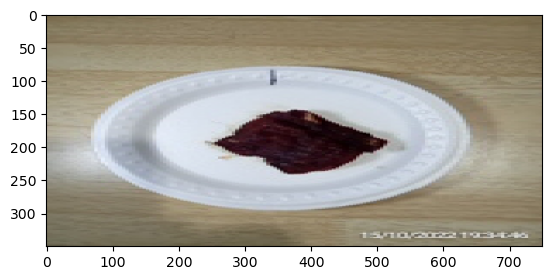

In [8]:
print_image('rotten', 30)

Fresh (100).jpg
\Users\somdd\Documents\Flatiron\Phase_5\Hello-Fresh\train\train\fresh\Fresh (100).jpg


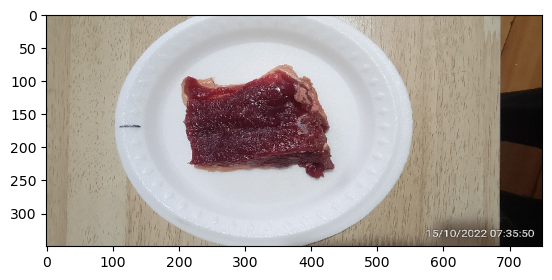

In [9]:
print_image('fresh', 1)

In [60]:
rgb, labels = train_generator.next()
zipped = list(zip(rgb,labels))

In [80]:
print(zipped[0][1])
print(zipped[20][1])

0.0
1.0


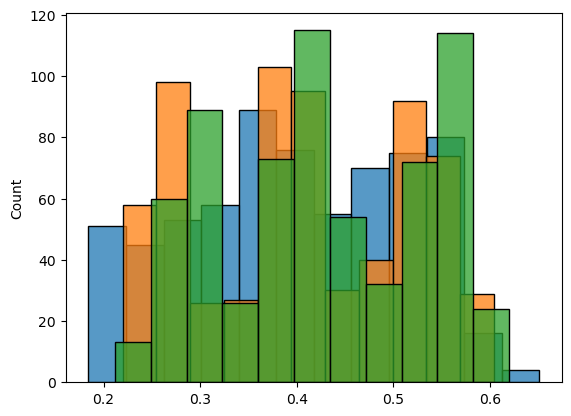

In [61]:
import seaborn as sns
sns.histplot(list(zipped[0][0][0].flatten()))
sns.histplot(list(zipped[0][0][1].flatten()))
sns.histplot(list(zipped[0][0][2].flatten()));

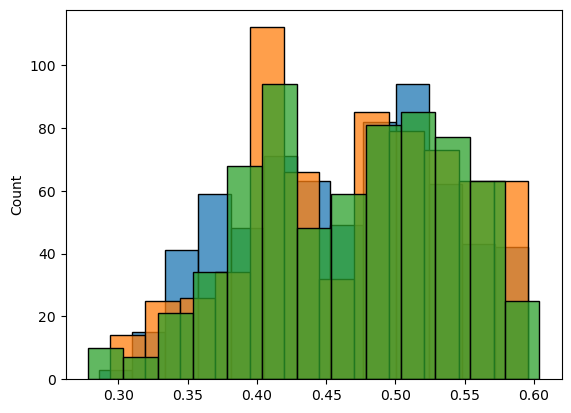

In [69]:
sns.histplot(list(zipped[20][0][0].flatten()))
sns.histplot(list(zipped[20][0][1].flatten()))
sns.histplot(list(zipped[20][0][2].flatten()));

In [149]:
train_generator.image_shape

(224, 224, 3)

### Modeling

In [88]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

#### FSM

In [73]:
# Building a first simple CNN and looking at the architecture
fsmodel = Sequential()
fsmodel.add(Conv2D(filters = 32, 
                   kernel_size = (4,4), 
                   activation = 'relu', 
                   input_shape = (224, 224, 3), 
                   padding = 'same'))
fsmodel.add(MaxPooling2D(pool_size = (2,2)))
fsmodel.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same'))
fsmodel.add(MaxPooling2D(pool_size = (2,2)))
fsmodel.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same'))
fsmodel.add(Flatten())
fsmodel.add(Dense(32, activation = 'relu'))
fsmodel.add(Dense(1, activation = 'sigmoid'))
fsmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 200704)            0

In [74]:
fsmodel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
fsm_cnn = fsmodel.fit(train_generator, epochs = 20, steps_per_epoch = 20, validation_data = validation_generator)

Epoch 1/20
20/20 [==============================] - 52s 3s/step - loss: 0.9688 - accuracy: 0.5672 - val_loss: 0.4947 - val_accuracy: 0.9276
Epoch 2/20
20/20 [==============================] - 50s 3s/step - loss: 0.3252 - accuracy: 0.8656 - val_loss: 0.2249 - val_accuracy: 0.9123
Epoch 3/20
20/20 [==============================] - 51s 3s/step - loss: 0.1803 - accuracy: 0.9219 - val_loss: 0.0540 - val_accuracy: 0.9912
Epoch 4/20
20/20 [==============================] - 51s 3s/step - loss: 0.0474 - accuracy: 0.9891 - val_loss: 0.0528 - val_accuracy: 0.9890
Epoch 5/20
20/20 [==============================] - 52s 3s/step - loss: 0.0436 - accuracy: 0.9891 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 6/20
20/20 [==============================] - 49s 2s/step - loss: 0.0580 - accuracy: 0.9854 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 7/20
20/20 [==============================] - 50s 3s/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 9.9770e-04 - val_accuracy: 1.0000
Epoch 8/20
20/20

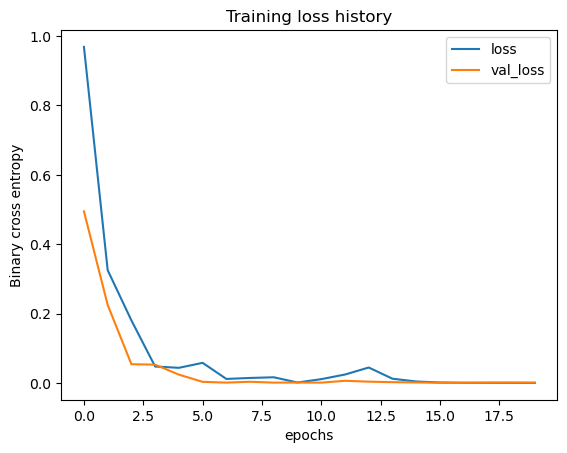

In [75]:
fsm_cnn_df =  pd.DataFrame(fsm_cnn.history)
fsm_cnn_df.index.name = 'epochs'
col_list = ['loss', 'val_loss']
fsm_cnn_df[col_list].plot()
plt.ylabel('Binary cross entropy')
plt.title('Training loss history')
plt.show()

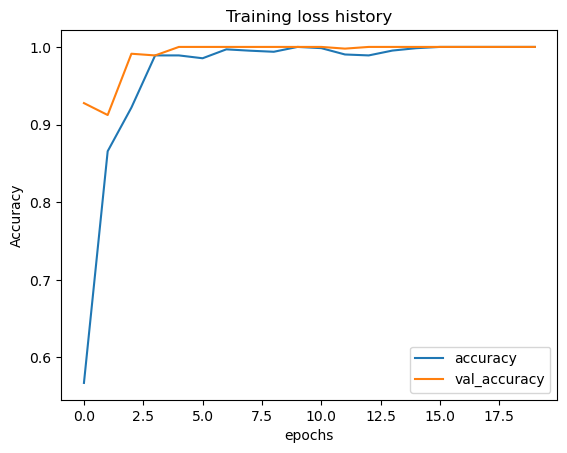

In [76]:
col_list = ['accuracy', 'val_accuracy']
fsm_cnn_df[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [78]:
test_loss, test_acc = fsmodel.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

31/31 [==============================] - 45s 1s/step - loss: 0.0701 - accuracy: 0.9806
Test loss: 0.07009971886873245 Test Acc: 0.9806122183799744


In [175]:
y_proba_fsm = fsmodel.predict(test_generator) 

31/31 [==============================] - 44s 1s/step


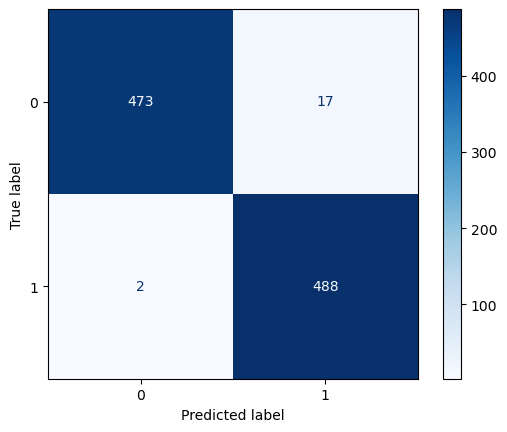

In [180]:
y_pred_fsm = (y_proba_fsm > 0.5).astype('int')
y_true = test_generator.classes
cm = confusion_matrix(y_true, y_pred_fsm)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Second Model

In [144]:
# Creating a new train generator with data augmentation
train_dir = '\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train'
train_datagen_aug = ImageDataGenerator(rescale = 1./255, 
                                       horizontal_flip = True, 
                                       validation_split = .2)
train_generator_aug = train_datagen_aug.flow_from_directory(train_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'binary',
                                                    seed = 24,
                                                    subset = 'training'
                                                   )

Found 1832 images belonging to 2 classes.


In [145]:
# Creating a validation generator with data augmentation
validation_generator_aug = train_datagen_aug.flow_from_directory(train_dir, target_size = (224, 224), 
                                                         color_mode = 'rgb', batch_size = 32,
                                                         class_mode = 'binary',
                                                         subset = 'validation',
                                                         seed = 24
                                                        )

Found 456 images belonging to 2 classes.


In [101]:
model2 = Sequential()
model2.add(Conv2D(filters = 32, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   input_shape = (224, 224, 3), 
                   padding = 'same', 
                 ))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same', 
                 ))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same', 
                ))

model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [102]:
model2_history = model2.fit(train_generator_aug, epochs = 20, steps_per_epoch = 20, validation_data = validation_generator_aug)

Epoch 1/20
20/20 [==============================] - 70s 3s/step - loss: 0.8843 - accuracy: 0.5141 - val_loss: 0.6752 - val_accuracy: 0.7303
Epoch 2/20
20/20 [==============================] - 65s 3s/step - loss: 0.6702 - accuracy: 0.5875 - val_loss: 0.6446 - val_accuracy: 0.6732
Epoch 3/20
20/20 [==============================] - 68s 3s/step - loss: 0.4820 - accuracy: 0.7828 - val_loss: 0.4245 - val_accuracy: 0.8004
Epoch 4/20
20/20 [==============================] - 67s 3s/step - loss: 0.2767 - accuracy: 0.9062 - val_loss: 0.0549 - val_accuracy: 0.9912
Epoch 5/20
20/20 [==============================] - 66s 3s/step - loss: 0.1547 - accuracy: 0.9481 - val_loss: 0.0870 - val_accuracy: 0.9803
Epoch 6/20
20/20 [==============================] - 64s 3s/step - loss: 0.0630 - accuracy: 0.9756 - val_loss: 0.2746 - val_accuracy: 0.9189
Epoch 7/20
20/20 [==============================] - 66s 3s/step - loss: 0.1698 - accuracy: 0.9464 - val_loss: 0.0460 - val_accuracy: 0.9890
Epoch 8/20
20/20 [==

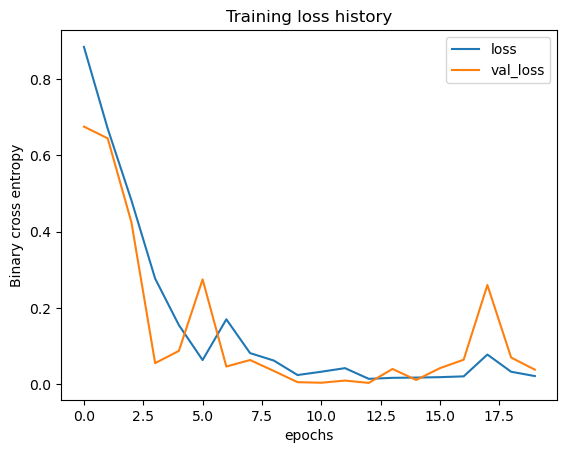

In [104]:
model2_df = pd.DataFrame(model2_history.history)
model2_df.index.name = 'epochs'
col_list = ['loss', 'val_loss']
model2_df[col_list].plot()
plt.ylabel('Binary cross entropy')
plt.title('Training loss history')
plt.show()

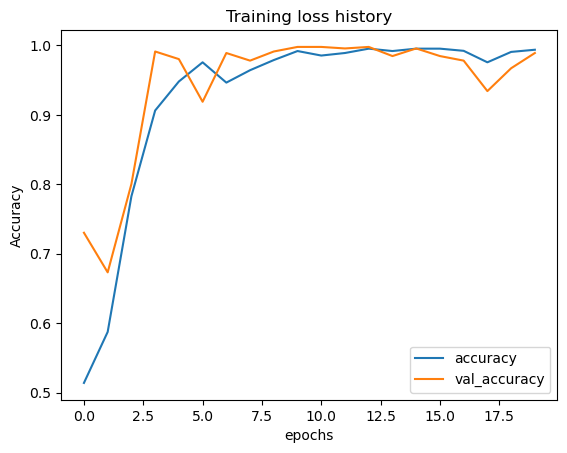

In [105]:
col_list = ['accuracy', 'val_accuracy']
model2_df[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [131]:
test_loss, test_acc = model2.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

31/31 [==============================] - 59s 2s/step - loss: 0.0542 - accuracy: 0.9806
Test loss: 0.05423416197299957 Test Acc: 0.9806122183799744


In [171]:
# Creating a new train generator with more data augmentation
train_dir = '\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train'
train_datagen_aug2 = ImageDataGenerator(rescale = 1./255, 
                                       horizontal_flip = True,
                                       vertical_flip =  True,
                                       rotation_range = 20,
                                       validation_split = .2)
train_generator_aug2 = train_datagen_aug2.flow_from_directory(train_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'categorical',
                                                    seed = 24,
                                                    subset = 'training'
                                                   )
# Creating a validation generator with data augmentation
validation_generator_aug2 = train_datagen_aug2.flow_from_directory(train_dir, target_size = (224, 224), 
                                                         color_mode = 'rgb', batch_size = 32,
                                                         class_mode = 'categorical',
                                                         subset = 'validation',
                                                         seed = 24
                                                        )
test_dir = '\\Users\\somdd\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\test\\test'
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator_cat = test_datagen.flow_from_directory(test_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'categorical',
                                                    seed = 24,
                                                    shuffle = False)                                                 

Found 1832 images belonging to 2 classes.
Found 456 images belonging to 2 classes.
Found 980 images belonging to 2 classes.


In [147]:
model3 = Sequential()
model3.add(Conv2D(filters = 32, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   input_shape = (224, 224, 3), 
                   padding = 'same', 
                 ))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same', 
                 ))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same', 
                ))

model3.add(Flatten())
model3.add(Dense(256, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dropout(0.25))
model3.add(Dense(2, activation = 'softmax'))
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [148]:
model_3_history = model3.fit(train_generator_aug2, epochs = 20, steps_per_epoch = 20, validation_data = validation_generator_aug2)

Epoch 1/20
20/20 [==============================] - 83s 4s/step - loss: 0.9296 - accuracy: 0.5130 - val_loss: 0.6918 - val_accuracy: 0.5351
Epoch 2/20
20/20 [==============================] - 83s 4s/step - loss: 0.6987 - accuracy: 0.5641 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 82s 4s/step - loss: 0.6524 - accuracy: 0.6438 - val_loss: 0.5066 - val_accuracy: 0.8311
Epoch 4/20
20/20 [==============================] - 83s 4s/step - loss: 0.5465 - accuracy: 0.7797 - val_loss: 0.3751 - val_accuracy: 0.9386
Epoch 5/20
20/20 [==============================] - 81s 4s/step - loss: 0.4847 - accuracy: 0.7703 - val_loss: 0.2357 - val_accuracy: 0.9320
Epoch 6/20
20/20 [==============================] - 78s 4s/step - loss: 0.1970 - accuracy: 0.9318 - val_loss: 0.1119 - val_accuracy: 0.9649
Epoch 7/20
20/20 [==============================] - 78s 4s/step - loss: 0.1357 - accuracy: 0.9500 - val_loss: 0.0583 - val_accuracy: 0.9759
Epoch 8/20
20/20 [==

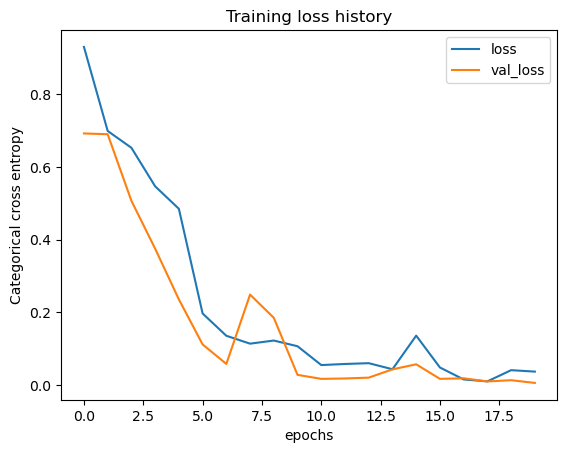

In [184]:
model3_df = pd.DataFrame(model_3_history.history)
model3_df.index.name = 'epochs'
col_list = ['loss', 'val_loss']
model3_df[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

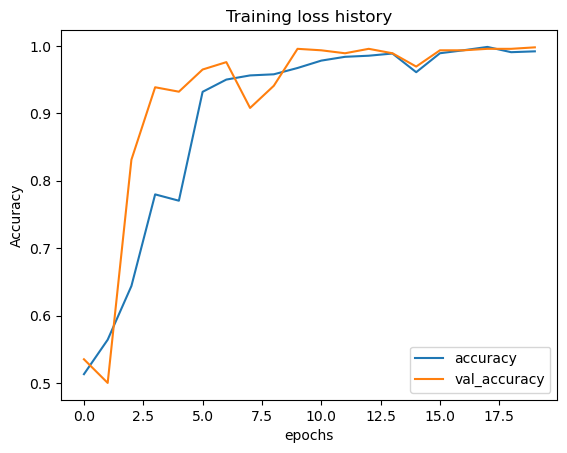

In [182]:
col_list = ['accuracy', 'val_accuracy']
model3_df[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [153]:
test_loss, test_acc = model3.evaluate(test_generator_cat)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

31/31 [==============================] - 64s 2s/step - loss: 0.0053 - accuracy: 0.9980
Test loss: 0.0053103105165064335 Test Acc: 0.9979591965675354


In [185]:
y_pred = model3.predict(test_generator_cat)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator_cat.classes

31/31 [==============================] - 44s 1s/step


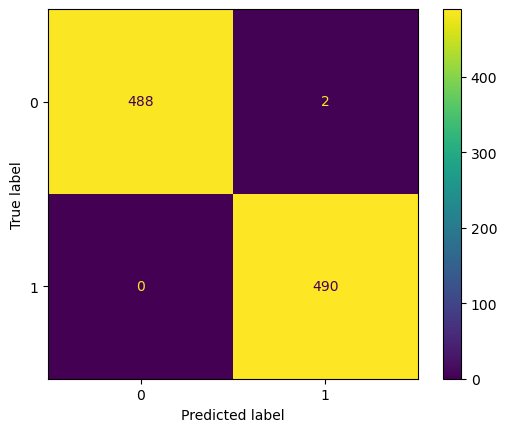

In [186]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()